In [1]:
inputs = """#################
#i.G..c...e..H.p#
########.########
#j.A..b...f..D.o#
########@########
#k.E..a...g..B.n#
########.########
#l.F..d...h..C.m#
#################"""

In [2]:
maze = {
    (x, y): value if value != '.' else '' 
    for (y, line) in enumerate(inputs.split('\n')) 
    for (x, value) in enumerate(line) if value != '#'}
values = {coords: value for coords, value in maze.items() if value}

In [3]:
neighbours = {
    (x, y): tuple([
        (x + xs, y + ys) 
        for (xs, ys) in ((1, 0), (-1, 0), (0, 1), (0, -1))
        if (x + xs, y + ys) in maze
    ]) for (x, y) in maze}

In [4]:
import networkx as nx

graph = nx.Graph()
for coords, value in maze.items():
    graph.add_node(
        coords, value=value, 
        need=value.lower() if value.isupper() else '')
for point_from, points_to in neighbours.items():
    for point_to in points_to:
        graph.add_edge(point_from, point_to, weight=1)

In [5]:
for start in values:
    for end in values:
        if start == end:
            continue
        path = nx.shortest_path(graph, start, end, 'weight')
        if any(point in values for point in path[1:-1]):
            continue
        length = nx.shortest_path_length(graph, start, end, 'weight')
        graph.add_edge(start, end, weight=length)
        
for point in maze:
    if point in values:
        continue
    graph.remove_node(point)

In [6]:
import matplotlib.pyplot as plt

def display(graph):
    fig, ax = plt.subplots()
    node_labels = nx.get_node_attributes(graph, 'value')
    edge_labels = nx.get_edge_attributes(graph, 'weight')

    pos = nx.circular_layout(graph)
    nx.draw_networkx_nodes(graph, pos, ax=ax)
    nx.draw_networkx_edges(graph, pos, ax=ax)
    nx.draw_networkx_labels(graph, pos, ax=ax, labels=node_labels)
    nx.draw_networkx_edge_labels(graph, pos, ax=ax, edge_labels=edge_labels)
    ax.axis('off')
    ax.plot()

<IPython.core.display.Javascript object>


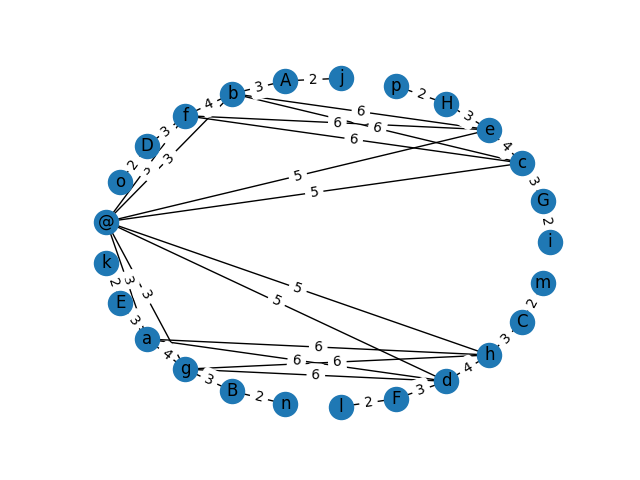

In [10]:
%matplotlib notebook
display(graph)

In [8]:
def truncate(graph, keys=None):
    subgraph = graph.copy()
    keys = set(keys) if keys else set()
    nodes = nx.get_node_attributes(graph, 'need')
    for point, need in nodes.items():
        if not need or need in keys:
            continue
        subgraph.remove_node(point)
    isolates = list(nx.isolates(subgraph))
    for isolate in isolates:
        subgraph.remove_node(isolate)
    return subgraph

<IPython.core.display.Javascript object>


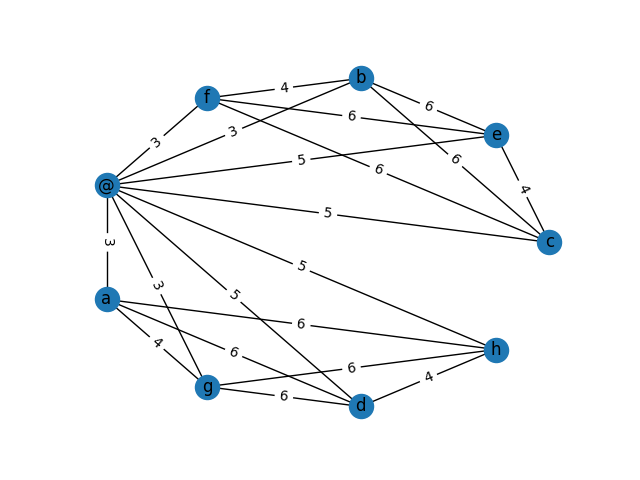

In [11]:
%matplotlib notebook
sg = truncate(graph)
display(sg)